In [1]:
import pandas as pd
import seaborn as sns
#reading freesurfer results
out_dir = '/output'
fsdata_file = out_dir+'/freesurfer_out_preped.csv'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);
tab_data.shape
## basic functions
from matplotlib import pyplot as plt
# distribution of large brain parts ratio
def lr_ratio(data, items_basic, items_single, items_lr):
    item_left   = [ "Left-"+x  for x in items_lr];
    item_right  = [ "Right-"+x for x in items_lr];
    items_all = items_single + item_left + item_right + items_lr;
    tmp_data = data[items_basic+items_single+item_left+item_right];
    for x in items_lr:
        tmp_data[x]  = tmp_data["Left-"+x] + tmp_data["Right-"+x]
    for x in items_all:
        tmp_data[x+"_r"] = tmp_data[x]/tmp_data["eTIV"]  
    return tmp_data, items_basic+items_all

def plot_6(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))
def plot_6sex(tmp_data, items_disp, TITLE, sv):
    fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1);
    sns.violinplot(y="diagnosis", x=items_disp[0], data=tmp_data, orient = 'h',
                   hue="sex",split=True, inner='box', ax=axs[0, 0]);
    sns.violinplot(y="diagnosis", x=items_disp[1], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 1]);
    sns.violinplot(y="diagnosis", x=items_disp[2], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[0, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[3], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 2]);
    sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h',
                   hue="sex", split=True, inner='box', ax= axs[1, 0]); 
    sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h',
                   hue="sex",  split=True, inner='box', ax= axs[1, 1]);
    fig.suptitle('Brain Structures (abs&Ratio): '+ TITLE, fontsize=22, x=0.5, y=1.05)
    if sv:
        fig.savefig(fig_dir / Path(TITLE+'.png'))
def dist_plot(df_data, focus_list, sv_name):
    for x in focus_list:
        tx=sns.jointplot(data=df_data[['age',x,'diagnosis']],
                         x='age', y= x, kind='reg')
        tx.savefig('figs/'+x+"_"+sv_name+".jpg", figsize=(24, 13))
def rm_age_sex(data, var_list):
    from sklearn import linear_model
    import numpy as np
    nc_data = data[data["is_NC"] == 1]
    x_nc = np.array([np.ones(nc_data.shape[0]), np.array((nc_data["is_Male"])), np.array((nc_data["age"]))]).T; 
    x_all= np.array([np.ones(data.shape[0]), np.array((data["is_Male"])), np.array((data["age"]))]).T;
    reg_list = []; new_col=[];
    for x in var_list:
        reg = linear_model.LinearRegression()
        y_nc= np.array(nc_data[x]);
        reg.fit(x_nc, y_nc);
        tmp_col = x+"_AgeSexRemoved"
        data[tmp_col] = data[x]-np.matmul(x_all[:,1:], reg.coef_[1:])
        data[tmp_col+"_resid"] = data[x]-reg.predict(x_all)
        data[tmp_col+"_resid_per"] = (data[x]-reg.predict(x_all))/data[x]
        reg_list.append(reg); new_col.append(tmp_col);
    return data, new_col, reg_list   


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

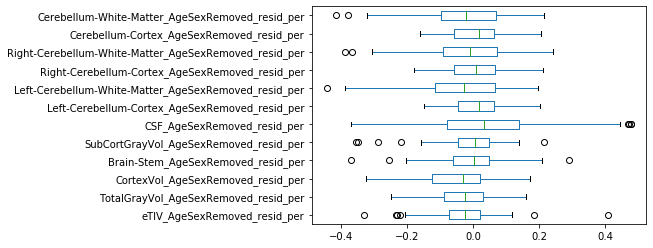

In [118]:
# plot distribution of brian tissues
x_focus = ['eTIV', 'TotalGrayVol', 'CortexVol',
       'Brain-Stem', 'SubCortGrayVol', 'CSF', 'Left-Cerebellum-Cortex',
       'Left-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex',
       'Right-Cerebellum-White-Matter', 'Cerebellum-Cortex',
       'Cerebellum-White-Matter', 'CortexVol_r', 'Brain-Stem_r',
       'SubCortGrayVol_r', 'CSF_r', 'Left-Cerebellum-Cortex_r',
       'Left-Cerebellum-White-Matter_r', 'Right-Cerebellum-Cortex_r',
       'Right-Cerebellum-White-Matter_r', 'Cerebellum-Cortex_r',
       'Cerebellum-White-Matter_r'];    
#dist_plot(tmp_data, x_focus, "age-distr")
from sklearn import linear_model
import numpy as np
items_basic = ["diagnosis", "age", "sex", "is_PD", "is_ET","is_NC",
               "is_Male", "is_Female", "eTIV", "TotalGrayVol",];
items_single = ["CortexVol", "Brain-Stem", "SubCortGrayVol", "CSF"];
items_lr  = ["Cerebellum-Cortex", "Cerebellum-White-Matter"];
tmp_data, items_all = lr_ratio(tab_data, items_basic, items_single, items_lr);

rm_AgeSex_list = items_all[8:];
rm_as_data, rm_as_col_list, rm_as_reg_list = rm_age_sex(tmp_data, rm_AgeSex_list)
# Check regression residuals
resid_list = [x+"_resid_per" for x in rm_as_col_list ];
rm_as_data[resid_list].plot.box(vert=False)
#rm_as_plot=sns.pairplot(rm_as_data, vars=rm_as_col_list[0:5],  hue="diagnosis", palette="Set2",
#                        diag_kind="kde", height=2.5)
#rm_as_plot.savefig("brain_age-sex-removed.jpg", figsize=(24,13))
#plt.scatter(tmpn_data["Cerebellum-Cortex-age_r"],  tmpn_data["Cerebellum-White-Matter-age_r"], color='black')
#plt.plot(np.sort(x[:,2]), (y-reg.predict(x))[np.lexsort((reg.predict(x),x[:,2]))], color='blue', linewidth=3)
#dist_plot(rm_as_data, rm_as_col_list, "age-sex-removed")


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
m1_form = "Q(\"Cerebellum-Cortex\") ~ is_ET + is_PD + is_NC"
m1 = glm(formula=m1_form, data=tmp_data)
res1=m1.fit()
print(res1.summary2())
m2_form = "Q(\"Cerebellum-White-Matter\") ~ is_ET + is_PD + is_NC"
m2 = glm(formula=m2_form, data=tmp_data)
res2=m2.fit()
print(res2.summary2())
m3_form = "Q(\"Cerebellum-Cortex_AgeSexRemoved\") ~ is_ET + is_PD + is_NC"
m3 = glm(formula=m3_form, data=tmp_data)
res3=m3.fit()
print(res3.summary2())
m4_form = "Q(\"Cerebellum-White-Matter_AgeSexRemoved\") ~ is_ET + is_PD + is_NC"
m4 = glm(formula=m4_form, data=tmp_data)
res4=m4.fit()
print(res4.summary2())

In [88]:
f_res=stats.f_oneway(tmp_data['Cerebellum-Cortex_AgeSexRemoved'][tmp_data['diagnosis'] == 'PD'],
                     tmp_data['Cerebellum-Cortex_AgeSexRemoved'][tmp_data['diagnosis'] == 'NC'])
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov
print(rp.summary_cont(tmp_data['Cerebellum-Cortex_r'].groupby(tmp_data['diagnosis'])))
print(rp.summary_cont(tmp_data['Cerebellum-White-Matter_r'].groupby(tmp_data['diagnosis'])))



            N    Mean      SD      SE  95% Conf.  Interval
diagnosis                                                 
ET         29  0.0641  0.0061  0.0011     0.0618    0.0665
NC         33  0.0656  0.0072  0.0012     0.0631    0.0682
PD         40  0.0682  0.0076  0.0012     0.0658    0.0706


            N    Mean      SD      SE  95% Conf.  Interval
diagnosis                                                 
ET         29  0.0171  0.0021  0.0004     0.0163    0.0179
NC         33  0.0178  0.0026  0.0005     0.0169    0.0188
PD         40  0.0182  0.0023  0.0004     0.0175    0.0190


In [6]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
from scipy.special import logit, expit

maov_formula = 'C(diagnosis) + C(sex)  + C(diagnosis):C(sex) + age ~ logit(Q(\"Cerebellum-White-Matter_r\"))'
maov = MANOVA.from_formula(maov_formula, data=tmp_data)
print(maov.mv_test())

                             Multivariate linear model
                                                                                   
-----------------------------------------------------------------------------------
       Intercept              Value       Num DF  Den DF       F Value       Pr > F
-----------------------------------------------------------------------------------
          Wilks' lambda            0.0000 7.0000 94.0000 10279943784081.8242 0.0000
         Pillai's trace            1.0000 7.0000 94.0000 10279943784081.8242 0.0000
 Hotelling-Lawley trace 765527728601.8380 7.0000 94.0000 10279943784081.8242 0.0000
    Roy's greatest root 765527728601.8380 7.0000 94.0000 10279943784081.8242 0.0000
-----------------------------------------------------------------------------------
                                                                                   
------------------------------------------------------------------------------------
     logit(Q("Cerebe

In [113]:
items_focus = ['CortexVol', 'Brain-Stem', 'SubCortGrayVol', 
               'Cerebellum-Cortex', 'Cerebellum-White-Matter', 'CSF'];
t1=sns.pairplot(tmp_data, vars=items_focus,  hue="diagnosis", palette="Set2",
                diag_kind="kde", height=2.5)
#t1.savefig("brain_all.jpg", figsize=(12,6.5))

'10'

array([False, False, False])

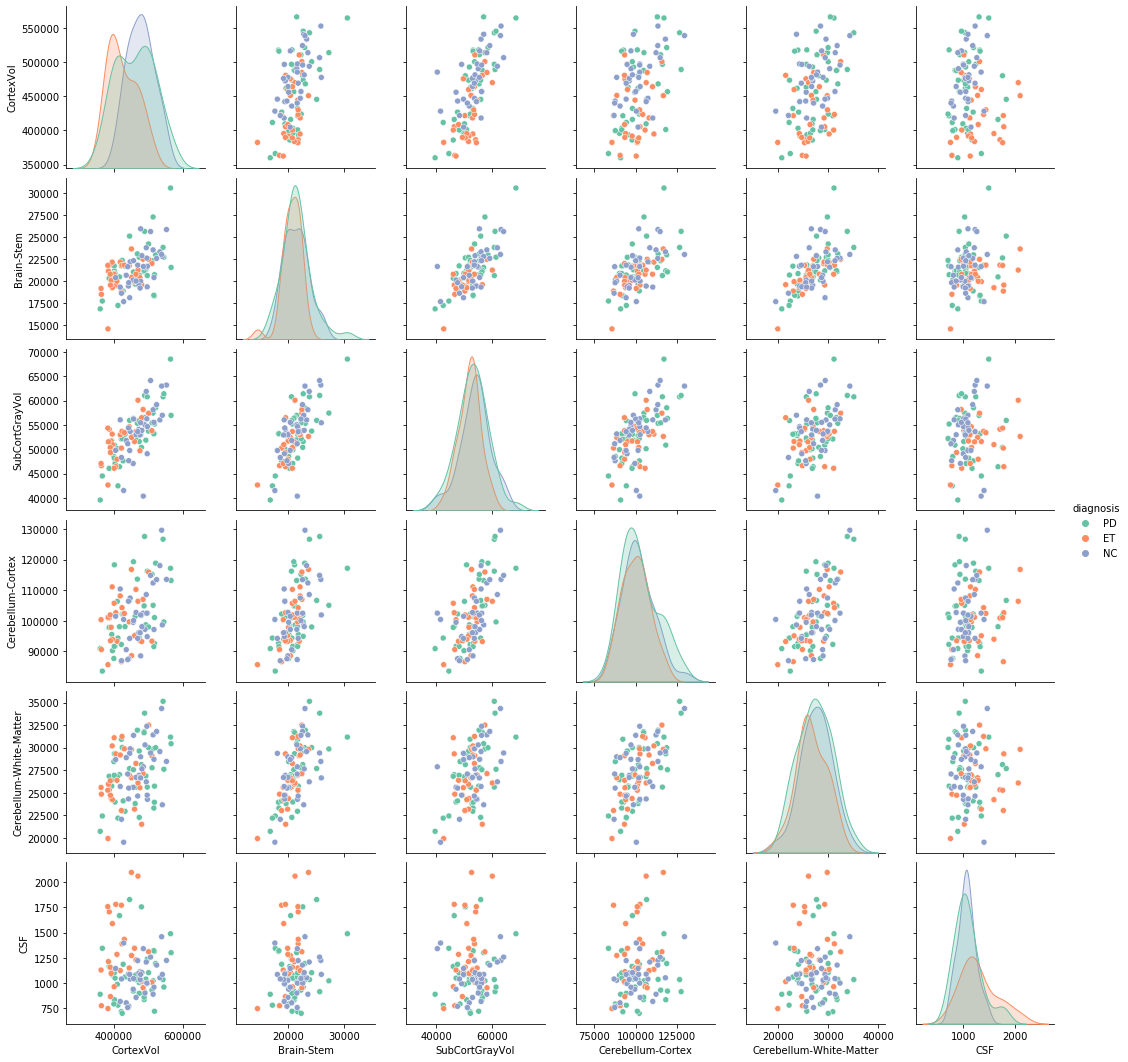

In [21]:
items_focus = ['CortexVol', 'Brain-Stem', 'SubCortGrayVol', 
               'Cerebellum-Cortex', 'Cerebellum-White-Matter', 'CSF'];
t1=sns.pairplot(tmp_data, vars=items_focus,  hue="diagnosis", palette="Set2",
                diag_kind="kde", height=2.5)
t1.savefig("brain_all.jpg", figsize=(12,6.5))

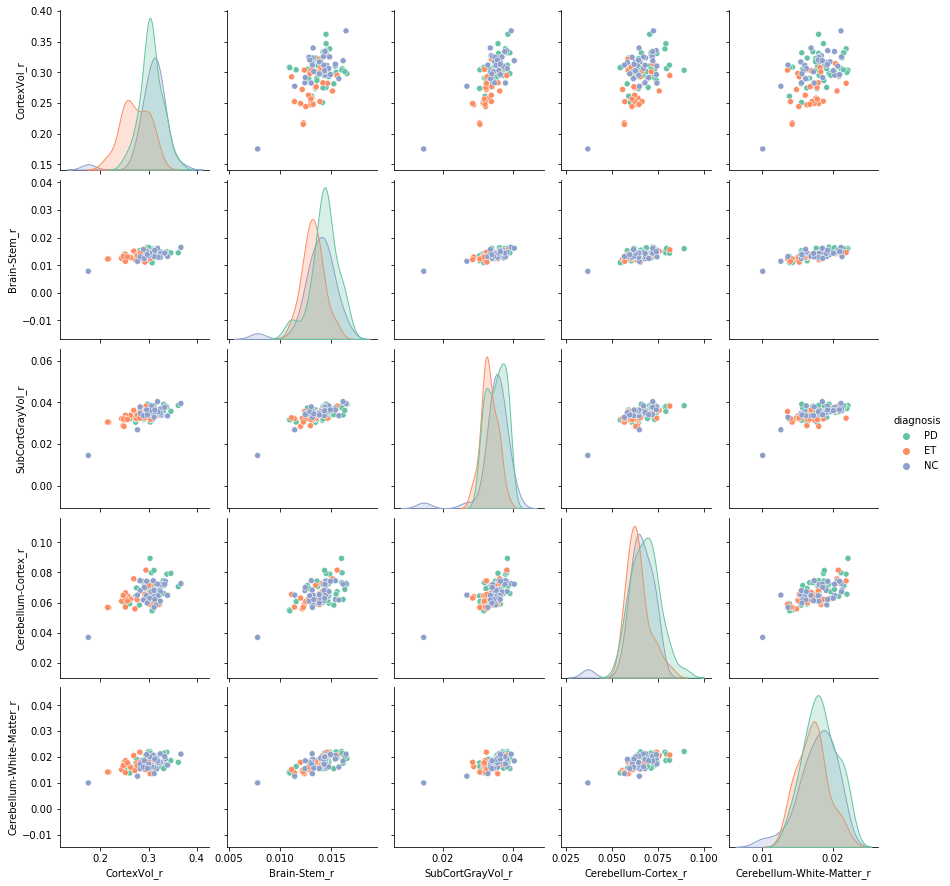

In [22]:
items_focus = ['CortexVol_r', 'Brain-Stem_r', 'SubCortGrayVol_r', 
               'Cerebellum-Cortex_r', 'Cerebellum-White-Matter_r'];
t1=sns.pairplot(tmp_data, vars=items_focus,  hue="diagnosis", palette="Set2",
                diag_kind="kde", height=2.5)
t1.savefig("brain_all_r.jpg", figsize=(12,6.5))

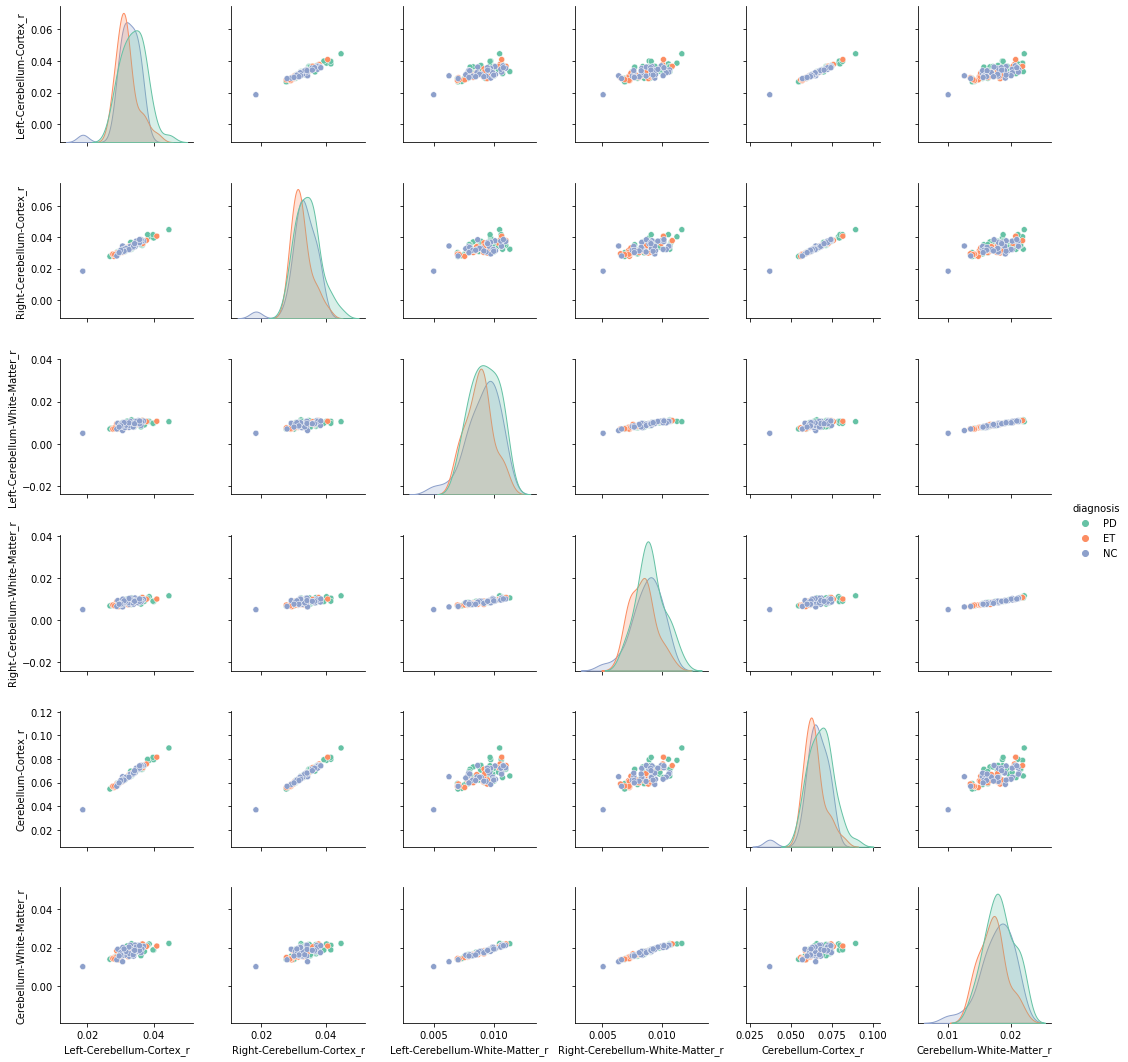

In [18]:
items_focus1 = ['Left-Cerebellum-Cortex_r', 'Right-Cerebellum-Cortex_r',
               'Left-Cerebellum-White-Matter_r', 'Right-Cerebellum-White-Matter_r',
              'Cerebellum-Cortex_r', 'Cerebellum-White-Matter_r'];
t2=sns.pairplot(tmp_data, vars=items_focus1,  hue="diagnosis", palette="Set2",
                diag_kind="kde", height=2.5)
t2.savefig("Cerebellum_r_lr.jpg", figsize=(12,6.5))

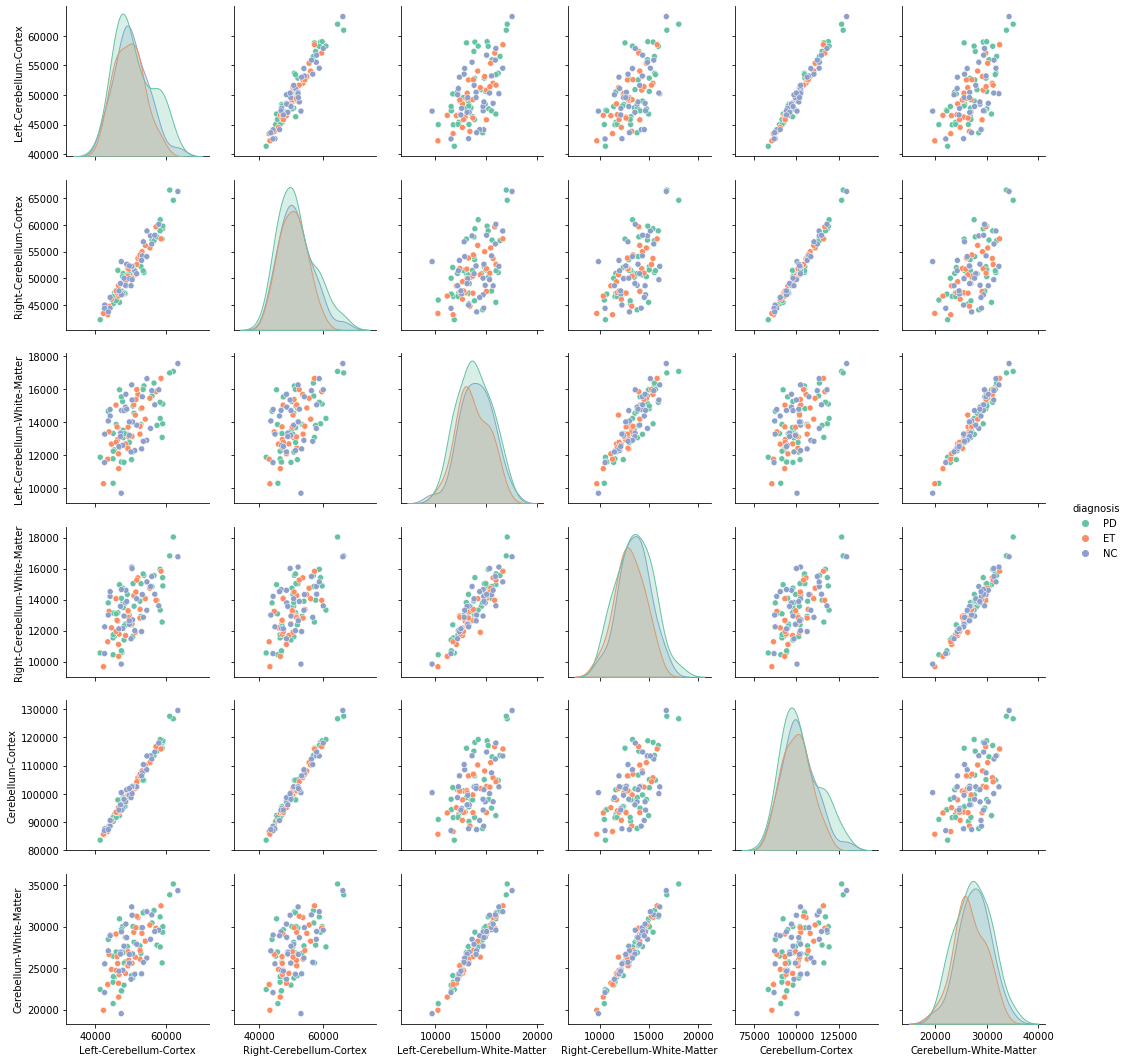

In [20]:
items_focus3 = ['Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex',
               'Left-Cerebellum-White-Matter', 'Right-Cerebellum-White-Matter',
              'Cerebellum-Cortex', 'Cerebellum-White-Matter'];
t3=sns.pairplot(tmp_data, vars=items_focus3,  hue="diagnosis", palette="Set2",
                diag_kind="kde", height=2.5)
t3.savefig("Cerebellum_lr.jpg", figsize=(12,6.5))

In [ ]:
items_focus3 = ['Left-Cerebellum-Cortex', 'Right-Cerebellum-Cortex',
               'Left-Cerebellum-White-Matter', 'Right-Cerebellum-White-Matter',
              'Cerebellum-Cortex', 'Cerebellum-White-Matter'];
t3=sns.pairplot(tmp_data, vars=items_focus3,  hue="diagnosis", palette="Set2",
                diag_kind="kde", height=2.5)
t3.savefig("Cerebellum_lr.jpg", figsize=(12,6.5))

In [43]:
tmp_data.columns

Index(['diagnosis', 'age', 'sex', 'eTIV', 'TotalGrayVol', 'CortexVol',
       'Brain-Stem', 'SubCortGrayVol', 'CSF', 'Left-Cerebellum-Cortex',
       'Left-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex',
       'Right-Cerebellum-White-Matter', 'Cerebellum-Cortex',
       'Cerebellum-White-Matter', 'CortexVol_r', 'Brain-Stem_r',
       'SubCortGrayVol_r', 'CSF_r', 'Left-Cerebellum-Cortex_r',
       'Left-Cerebellum-White-Matter_r', 'Right-Cerebellum-Cortex_r',
       'Right-Cerebellum-White-Matter_r', 'Cerebellum-Cortex_r',
       'Cerebellum-White-Matter_r'],
      dtype='object')

In [135]:
# plot distribution of brian tissues
x_focus = ['eTIV', 'TotalGrayVol', 'CortexVol',
       'Brain-Stem', 'SubCortGrayVol', 'CSF', 'Left-Cerebellum-Cortex',
       'Left-Cerebellum-White-Matter', 'Right-Cerebellum-Cortex',
       'Right-Cerebellum-White-Matter', 'Cerebellum-Cortex',
       'Cerebellum-White-Matter', 'CortexVol_r', 'Brain-Stem_r',
       'SubCortGrayVol_r', 'CSF_r', 'Left-Cerebellum-Cortex_r',
       'Left-Cerebellum-White-Matter_r', 'Right-Cerebellum-Cortex_r',
       'Right-Cerebellum-White-Matter_r', 'Cerebellum-Cortex_r',
       'Cerebellum-White-Matter_r'];
def dist_plot(df_data, focus_list, sv_name):
    for x in focus_list:
        tx=sns.jointplot(data=df_data[['age',x,'diagnosis']],
                         x='age', y= x, kind='reg')
        tx.savefig('figs/'+x+"_"+sv_name+".jpg", figsize=(24, 13))
dist_plot(tmp_data, x_focus, "age-distr")

from sklearn import linear_model
fsndata_file = out_dir+'/freesurfer_out_num.csv'
n_groups = len(GROUPS);
tabn_data = pd.read_csv(fsndata_file, sep=',', header=0, index_col=0);
items_basic = ["diagnosis", "age", "sex", "eTIV", "TotalGrayVol"];
items_single  = ["CortexVol", "Brain-Stem", "SubCortGrayVol", "CSF"];
items_lr  = ["Cerebellum-Cortex", "Cerebellum-White-Matter"];
tmpn_data, items_all = lr_ratio(tabn_data, items_basic, items_single, items_lr);

def rm_age_sex(data, var_list):
    from sklearn import linear_model
    nc_data = data[data["diagnosis"] == 0]
    x_nc = np.array([np.ones(nc_data.shape[0]), np.array((nc_data["sex"])), np.array((nc_data["age"]))]).T; 
    x_all= np.array([np.ones(data.shape[0]), np.array((data["sex"])), np.array((data["age"]))]).T;
    reg_list = []; new_col=[];
    for x in var_list:
        reg = linear_model.LinearRegression()
        y_nc= np.array(nc_data[x]);
        reg.fit(x_nc, y_nc);
        tmp_col = x+"_AgeSexRemoved"
        data[tmp_col] = data[x]-np.matmul(x_all[:,1:], reg.coef_[1:])
        data[tmp_col+"_resid"] = data[x]-reg.predict(x_all)
        data[tmp_col+"_resid_per"] = (data[x]-reg.predict(x_all))/data[x]
        reg_list.append(reg); new_col.append(tmp_col);
    return data, new_col, reg_list

rm_AgeSex_list = items_all[3:];
rm_as_data, rm_as_col_list, rm_as_reg_list = rm_age_sex(tmpn_data, rm_AgeSex_list)
# Check regression residuals
resid_list = [x+"_resid_per" for x in rm_as_col_list ];
rm_as_data[resid_list].plot.box(vert=False)
#rm_as_plot=sns.pairplot(rm_as_data, vars=rm_as_col_list[0:5],  hue="diagnosis", palette="Set2",
#                        diag_kind="kde", height=2.5)
#rm_as_plot.savefig("brain_age-sex-removed.jpg", figsize=(24,13))
#plt.scatter(tmpn_data["Cerebellum-Cortex-age_r"],  tmpn_data["Cerebellum-White-Matter-age_r"], color='black')
#plt.plot(np.sort(x[:,2]), (y-reg.predict(x))[np.lexsort((reg.predict(x),x[:,2]))], color='blue', linewidth=3)
#dist_plot(rm_as_data, rm_as_col_list, "age-sex-removed")
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import glm
resid_list = [x+"_resid_per" for x in rm_as_col_list ];
print(resid_list)

formula = 'Q(\"Cerebellum-Cortex_AgeSexRemoved\") ~  Q(\"Brain-Stem_AgeSexRemoved\") + Q(\"Cerebellum-White-Matter\")'
mod1 = smf.glm(formula=formula, data=rm_as_data, family=sm.families.Gaussian(sm.families.links.log))
res1=mod1.fit()
res1.summary()
#import patsy.builtins.Q as Q
#m1_form = "Q(\"Cerebellum-Cortex_r\") ~ age + sex"
#m1 = glm(formula=m1_form, data=tmp_data)
#res1=m1.fit()
#m1.summary()
#print(res1.summary())
#m2_form = "Q(\"Cerebellum-White-Matter_r\") ~ age + sex"
#m2 = glm(formula=m2_form, data=tmp_data)
#res2=m2.fit()
#print(res2.summary())

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


Computing regularization path using the coordinate descent lasso...
Computing regularization path using the Lars lasso...


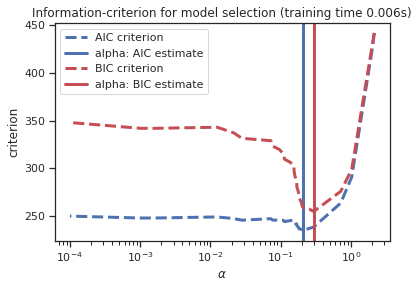

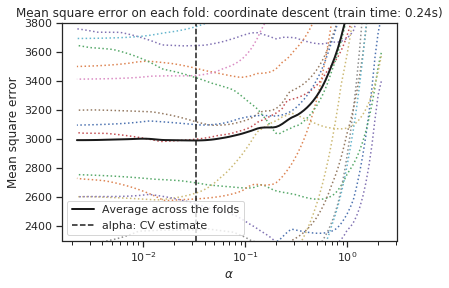

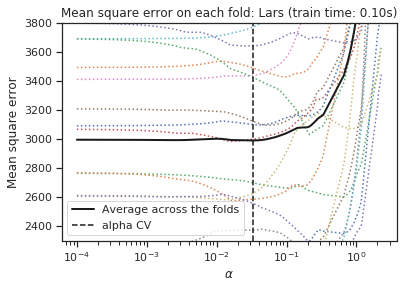

In [134]:
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

X, y = datasets.load_diabetes(return_X_y=True)

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

X=
# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
plt.figure()
ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_, linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()